# EDA for Kaggle Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn import linear_model
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

import tensorflow as tf
tf.config.run_functions_eagerly(True)

from keras.utils import set_random_seed
from keras.models import Sequential
from keras.layers import Dense, InputLayer, Dropout
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from sklearn import metrics

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.T.drop_duplicates().T
data = data.interpolate()
data = data.dropna()
X = data.drop(["id", "y"], axis = 1)
y = data["y"]


# Basic Information

In [ ]:
data.head()

,id,x001,x002,x003,x004,x005,x006,x007,x008,x009,...,x757,x758,x759,x760,x761,x762,x763,x764,x765,y
0,0,9.681860e+10,6991.15,7.76,0.00380,5.378811e+09,0.31,266117.20,934577.0,14539.0,...,0.0007,297281012,0.13,5.0,5,2.0,8.5127,14.28,-0.75,5
2,2,3.218944e+10,3991.98,5.77,0.00010,2.476111e+09,0.00,774385.01,375738.0,144143.0,...,0.0029,100474819,0.39,39.0,2,18.0,9.6800,25.06,-0.49,11
4,4,3.063412e+10,3621.00,7.52,0.00060,1.392460e+09,0.21,169860.29,474253.0,17914.0,...,0.0005,109546590,0.11,11.0,1,3.0,16.2717,5.81,-0.42,5
5,5,4.377769e+10,27776.26,6.02,0.00505,5.472212e+09,0.50,10797026.17,4501083.0,7538720.0,...,0.6223,154000000000000,0.52,1883.0,1,1055.0,4.5550,271.84,0.62,1
7,7,1.583740e+10,17060.72,5.73,0.00275,2.262486e+09,0.49,10151935.50,2262318.0,4887848.0,...,0.4630,7170000000000,0.86,2007.0,1,1113.0,5.5842,137.96,-0.94,3


In [ ]:
X.shape

(2857, 765)

In [ ]:
data.isnull().sum()

id      0
x001    0
x002    0
x003    0
x004    0
       ..
x762    0
x763    0
x764    0
x765    0
y       0
Length: 767, dtype: int64

In [ ]:
data.dtypes.value_counts()

float64    657
int64       99
object      11
dtype: int64

In [ ]:
np.abs(data.corrwith(y)).sort_values()

x376    0.000454
x054    0.000863
x536    0.000868
x132    0.001202
x681    0.001357
          ...   
x465         NaN
x518         NaN
x594         NaN
x643         NaN
x703         NaN
Length: 756, dtype: float64

# PCA

In [4]:
X = X.dropna()

In [5]:
test = pd.read_csv("test.csv")


In [6]:
test = test.astype("float")

In [7]:
test.T.drop_duplicates().T
test = test.interpolate()



In [8]:
test = test.fillna(0)

In [9]:
X_test = test.drop(["id"], axis = 1)

In [10]:
sc = StandardScaler()
sc.fit(X)
X_scaled = sc.transform(X)
X_test_scaled = sc.transform(X_test)

pca = PCA(n_components=0.99, svd_solver="full")
X_transformed = pca.fit_transform(X_scaled)

X_test_transformed = pca.transform(X_test_scaled)

In [ ]:

linreg = LinearRegression().fit(X_transformed, y)

y_pred = linreg.predict(X_test_transformed)

In [ ]:
from sklearn import linear_model
clf = linear_model.Lasso()
clf.fit(X_transformed, y)
y_pred = clf.predict(X_test_transformed)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=5)
neigh.fit(X_transformed, y)
y_pred = neigh.predict(X_test_transformed)

## Lasso

In [11]:
models = {'OLS': linear_model.LinearRegression(),
         'Lasso': linear_model.Lasso(),
         'Ridge': linear_model.Ridge(),}

In [34]:
lasso_params = {'alpha':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}
ridge_params = {'alpha':[200, 300, 400, 500]}

models2 = {'OLS': linear_model.LinearRegression(),
           'Lasso': GridSearchCV(linear_model.Lasso(), 
                               param_grid=lasso_params).fit(X_transformed, y).best_estimator_,
           'Ridge': GridSearchCV(linear_model.Ridge(), 
                               param_grid=ridge_params).fit(X_transformed, y).best_estimator_,}

In [37]:
lassoreg = models2["Lasso"]
y_pred = lassoreg.predict(X_test_transformed)

## NN

In [11]:
X_transformed.shape

(5370, 227)

In [23]:
network = Sequential() 

network.add(InputLayer(input_shape=(227,))) # input layer
network.add(Dropout(0.3))
network.add(Dense(500, activation='relu', kernel_initializer='HeNormal')) 
network.add(Dropout(0.3))
network.add(Dense(200, activation='relu', kernel_initializer='HeNormal')) 
network.add(Dropout(0.3))
network.add(Dense(100, activation='relu', kernel_initializer='HeNormal'))
network.add(Dropout(0.3))
network.add(Dense(50, activation='relu', kernel_initializer='HeNormal'))
network.add(Dropout(0.3))
network.add(Dense(20, activation='relu', kernel_initializer='HeNormal')) 
network.add(Dense(1, activation='linear', kernel_initializer='HeNormal')) # output layer

In [24]:
network.compile(loss='mean_squared_error')
# categorical_crossentropy for classification

history = network.fit(X_transformed, y, epochs=20)

y_pred = network.predict(X_test_transformed)

Epoch 1/20
168/168 [==============================] - 4s 21ms/step - loss: 140.1779
Epoch 2/20
168/168 [==============================] - 4s 21ms/step - loss: 122.5563
Epoch 3/20
168/168 [==============================] - 3s 20ms/step - loss: 115.2844
Epoch 4/20
168/168 [==============================] - 3s 20ms/step - loss: 111.6740
Epoch 5/20
168/168 [==============================] - 3s 20ms/step - loss: 107.8311
Epoch 6/20
168/168 [==============================] - 5s 29ms/step - loss: 107.0433
Epoch 7/20
168/168 [==============================] - 5s 28ms/step - loss: 101.8549
Epoch 8/20
168/168 [==============================] - 4s 21ms/step - loss: 94.3645
Epoch 9/20
168/168 [==============================] - 4s 21ms/step - loss: 96.1739
Epoch 10/20
168/168 [==============================] - 3s 19ms/step - loss: 97.2604
Epoch 11/20
168/168 [==============================] - 3s 19ms/step - loss: 87.7227
Epoch 12/20
168/168 [==============================] - 6s 34ms/step - loss: 90

In [20]:
y_pred.flatten()

array([4.0365524, 4.0737514, 3.4777052, ..., 5.0569086, 9.273565 ,
       3.9625456], dtype=float32)

In [21]:
d = {'id': range(5380, 9783), 'y': y_pred.flatten()}
df = pd.DataFrame(data=d)

In [22]:
df.to_csv("test_submission.csv", index=False)

In [ ]:
variances = pca.explained_variance_ratio_

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (227,) and arg 1 with shape (84,).

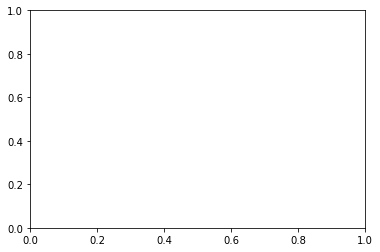

In [ ]:
plt.bar(range(227), variances)
plt.xlabel('PC Number')
plt.ylabel('Portion of Variance Explained')
plt.title("PCA")
plt.show()

# Lasso then PCA

In [12]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [13]:
sc = StandardScaler()
sc.fit(X)
X_scaled = sc.transform(X)
X_test_scaled = sc.transform(X_test)

In [14]:
sel_ = SelectFromModel(
    LogisticRegression(C=0.5, penalty='l1', solver='liblinear', random_state=10))
sel_.fit(X_scaled, y)

SelectFromModel(estimator=LogisticRegression(C=0.5, penalty='l1',
                                             random_state=10,
                                             solver='liblinear'))

In [20]:
X_train_selected = sel_.transform(X_scaled)
X_test_selected = sel_.transform(X_test_scaled)

In [21]:
X_test_selected.shape

(4403, 588)

# Feature selection

In [149]:
data = pd.read_csv('train.csv')
data = data.dropna()
X = data.drop(["id", "y"], axis = 1)
y = data["y"]

In [150]:
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=100, step=1)
selector = selector.fit(X, y)

In [151]:
cols_OK = selector.support_
X.loc[:, cols_OK]


,x002,x003,x004,x005,x006,x014,x015,x017,x018,x019,...,x649,x653,x659,x662,x663,x674,x713,x719,x720,x736
0,6991.15,7.76,0.00380,5.378811e+09,0.31,4.82,0.607650,1.31,0.39125,2,...,1727.85,116958,585.0,444675.0,586,1890.83,57779.64,1336.88,7.468810e+05,64976.93
2,3991.98,5.77,0.00010,2.476111e+09,0.00,6.62,0.813915,1.11,0.84540,0,...,1168.00,40359,338.0,1012500.0,339,1462.54,74727.38,5267.48,1.384719e+06,66839.94
4,3621.00,7.52,0.00060,1.392460e+09,0.21,2.43,0.803614,1.04,0.85910,1,...,1935.00,55277,290.0,1254723.0,291,1954.77,617018.29,1291.61,3.594290e+05,139096.39
5,27776.26,6.02,0.00505,5.472212e+09,0.50,3.65,0.630500,1.00,0.40000,4,...,803.87,114650,7776.0,1227755.0,7777,883.81,1445.62,6962.15,1.012291e+09,6309319.01
7,17060.72,5.73,0.00275,2.262486e+09,0.49,7.82,0.845814,1.02,0.77660,4,...,678.00,56722,4380.0,813564.0,4381,820.47,140.07,29622.49,2.678211e+08,6021341.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5365,6976.24,7.54,0.00110,2.001056e+09,0.36,6.12,0.850860,1.24,0.86305,3,...,1892.00,75574,155.0,1213761.0,156,2319.45,20339.99,9415.01,2.285527e+06,14307.17
5367,36011.48,5.52,0.00070,1.513157e+09,0.40,2.69,0.798900,1.21,0.77350,1,...,446.00,30674,4543.0,1049536.0,4544,446.00,1333.27,73947.56,3.360874e+09,1392203.96
5370,17683.59,6.88,0.00080,1.998125e+09,0.29,2.95,0.810286,1.31,0.85200,2,...,1815.00,41850,1319.0,1032608.0,1320,2145.25,35973.69,1646.35,7.834512e+07,225819.23
5376,21572.94,6.96,0.00120,3.093006e+09,0.30,5.40,0.855833,1.28,0.89455,3,...,2744.00,69682,330.0,1180000.0,331,3745.78,742576.67,819.77,8.283120e+07,46539.19


In [152]:
cols_OK = selector.support_
X = X.loc[:, cols_OK]


In [143]:
linreg = LinearRegression().fit(X, y)
linreg.score(X, y)

0.2472654161838348

In [144]:
y_pred = linreg.predict(X)
mean_squared_error(y, y_pred, squared="false")

83.65143806949324